In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# read cleaned csv data
cleaned_movie_pd = pd.read_csv("output_data/clean_data_for_analysis.csv")
cleaned_movie_pd

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [3]:
cleaned_movie_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1153 non-null   object 
 1   Type         1153 non-null   object 
 2   Release      1153 non-null   object 
 3   Runtime      1153 non-null   float64
 4   Genre        1153 non-null   object 
 5   Nominations  167 non-null    float64
 6   Metascore    1053 non-null   float64
 7   imdbRating   1153 non-null   float64
 8   imdbVotes    1153 non-null   int64  
 9   imdbID       1153 non-null   object 
 10  Budget       500 non-null    float64
 11  Gross        837 non-null    float64
 12  Platform     1153 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 117.2+ KB


In [4]:
# drop imdbID == tt10579952 (budget not in USD)
cleaned_movie_pd_drop = cleaned_movie_pd.drop(index = 950)
cleaned_movie_pd_drop

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [6]:
# convert Release date to datetime data type
# then get only the released year
cleaned_movie_pd_drop["Release"] = pd.to_datetime(cleaned_movie_pd_drop["Release"]).dt.year
cleaned_movie_pd_drop

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [7]:
# filter out pre- and post- and during-covid data
movies_pre_covid = cleaned_movie_pd_drop.loc[(cleaned_movie_pd["Release"] == 2018) |
                                        (cleaned_movie_pd["Release"] == 2019), :]

movies_post_covid = cleaned_movie_pd_drop.loc[(cleaned_movie_pd["Release"] == 2021) |
                                        (cleaned_movie_pd["Release"] == 2022), :]

movies_during_covid = cleaned_movie_pd_drop.loc[(cleaned_movie_pd["Release"] == 2020), :]

In [8]:
# group by average imdbRatings for each release year for all film types
movies_rating_grp = pd.DataFrame(cleaned_movie_pd_drop.groupby(["Release"])[["imdbRating", "Metascore"]].mean())
movies_rating_grp

,imdbRating,Metascore
Release,,
2018,6.355869,57.836634
2019,6.363492,56.530726
2020,6.061712,55.173913
2021,6.163701,57.345238
2022,6.031579,58.915493


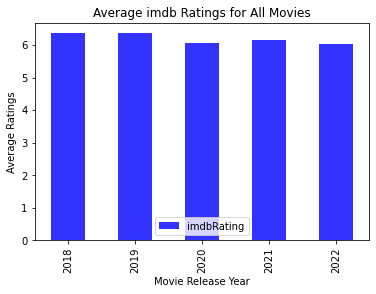

In [9]:
# plot the movie ratings against release year for all movies

move_rating_plot = movies_rating_grp.plot(kind = "bar", y = ["imdbRating"], color = "b", alpha = 0.8)


plt.xlabel("Movie Release Year")
plt.ylabel("Average Ratings")
plt.title("Average imdb Ratings for All Movies")
plt.show()

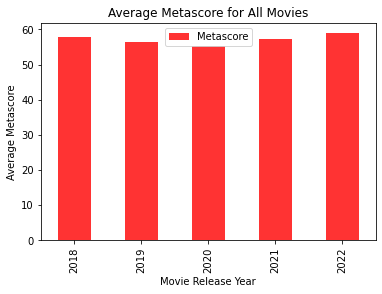

In [10]:
# plot the movie Metascore against release year for all movies

move_rating_plot = movies_rating_grp.plot(kind = "bar", y = ["Metascore"], color = "r", alpha = 0.8)


plt.xlabel("Movie Release Year")
plt.ylabel("Average Metascore")
plt.title("Average Metascore for All Movies")
plt.show()

In [11]:
# group by average gross for each release year
all_movies_gross_grp = pd.DataFrame(cleaned_movie_pd_drop.groupby(["Release"])[["Budget", "Gross"]].mean())
all_movies_gross_grp

,Budget,Gross
Release,,
2018,4.845898e+07,1.297669e+08
2019,5.009270e+07,1.322612e+08
2020,4.408144e+07,2.798931e+07
2021,6.956429e+07,5.890553e+07
2022,6.494768e+07,1.021143e+08


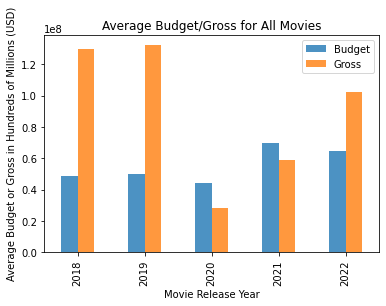

In [12]:
# plot the movie gross against release year for all film types
all_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for All Movies")
plt.show()

# tested - empty cells do not count towards average/sum calculations

In [14]:
# split data groups to non-streaming and streaming (netflix)
non_streaming_df = cleaned_movie_pd_drop.loc[(cleaned_movie_pd_drop["Platform"] == "others"), :]
streaming_df = cleaned_movie_pd_drop.loc[(cleaned_movie_pd_drop["Platform"] == "netflix"), :]

In [15]:
# plot the movie gross against release year for non-streaming & streaming film types
nonstreaming_movies_gross_grp = pd.DataFrame(non_streaming_df.groupby(["Release"])[["Budget", "Gross"]].mean())
streaming_movies_gross_grp = pd.DataFrame(streaming_df.groupby(["Release"])[["Budget", "Gross"]].mean())
streaming_movies_gross_grp

,Budget,Gross
Release,,
2018,3.250000e+07,1.296316e+06
2019,5.582000e+07,4.182952e+05
2020,4.657143e+07,1.849500e+05
2021,6.350000e+07,2.105103e+05
2022,7.674000e+07,1.556272e+05


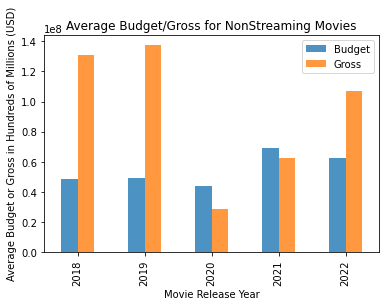

In [16]:
# plot the movie gross against release year for non-streaming film types

nonstreaming_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for NonStreaming Movies")
plt.show()


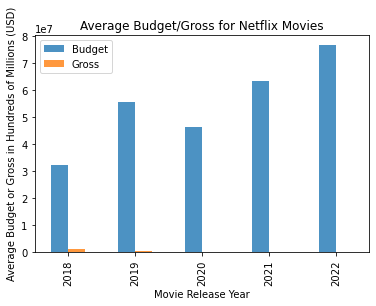

In [17]:
# plot the movie gross against release year for streaming film types

streaming_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for Netflix Movies")
plt.show()

In [31]:
# Average Gross per genre for nonstreaming movies (some do not have gross value)
genre_df = pd.DataFrame(non_streaming_df.groupby(["Release", "Genre"])["Gross"].mean().dropna())
genre_df

Gross
Release Genre                    
2018    Action       2.505763e+08
        Adventure    1.422069e+08
        Animation    3.349816e+08
        Biography    7.165665e+07
        Comedy       4.371985e+07
        Crime        3.914595e+07
        Documentary  1.270910e+07
        Drama        5.019820e+07
        Horror       1.393125e+08
        Sci-Fi       1.087800e+04
2019    Action       2.578661e+08
        Adventure    1.179167e+08
        Animation    3.814244e+08
        Biography    3.483071e+07
        Comedy       7.537031e+07
        Crime        1.689495e+08
        Drama        4.217689e+07
        Fantasy      2.112779e+07
        Horror       1.080558e+08
        Thriller     3.430380e+05
2020    Action       7.283584e+07
        Adventure    1.813343e+08
        Animation    1.288114e+08
        Biography    7.602265e+06
        Comedy       6.158637e+06
        Crime        6.338142e+06
        Drama        7.183216e+06
        Fantasy      2.489630e+07
        Horror       9.398299e+05
        Music        1.808490e+05
        Thriller     3.517949e+06
2021    Action       1.908868e+08
        Adventure    1.025515e+08
        Animation    1.062319e+08
        Biography    1.576730e+07
        Comedy       3.964518e+06
        Crime        1.432595e+07
        Documentary  1.386626e+06
        Drama        1.511578e+07
        Fantasy      8.042500e+04
        History      3.713294e+06
        Horror       5.944108e+07
        Mystery      1.640019e+07
2022    Action       2.942131e+08
        Adventure    4.071508e+08
        Animation    1.583626e+08
        Biography    5.437063e+07
        Comedy       2.207404e+07
        Crime        3.667746e+07
        Documentary  2.688698e+07
        Drama        1.836019e+07
        Family       1.115158e+06
        Fantasy      4.588389e+06
        Horror       7.745254e+07
        Mystery      2.664660e+05
        Thriller     3.054116e+06

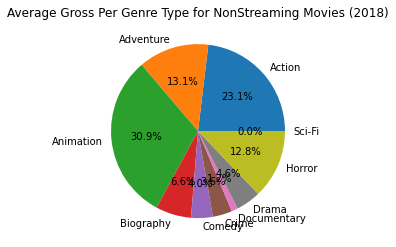

In [33]:
# gross per genre type for 2018 for nonstreaming movies
genre_df_2018 = genre_df.loc[2018].reset_index(drop = False)
 
plt.pie(genre_df_2018["Gross"], labels = genre_df_2018["Genre"], autopct="%1.1f%%")
plt.title("Average Gross Per Genre Type for NonStreaming Movies (2018)")
plt.show()

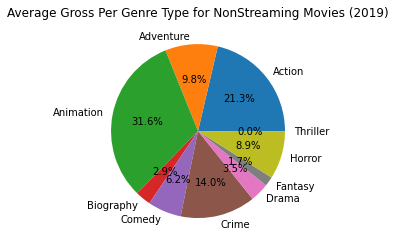

In [34]:
# gross per genre type for 2019 for nonstreaming movies
genre_df_2019 = genre_df.loc[2019].reset_index(drop = False)

plt.pie(genre_df_2019["Gross"], labels = genre_df_2019["Genre"], autopct="%1.1f%%")
plt.title("Average Gross Per Genre Type for NonStreaming Movies (2019)")
plt.show()

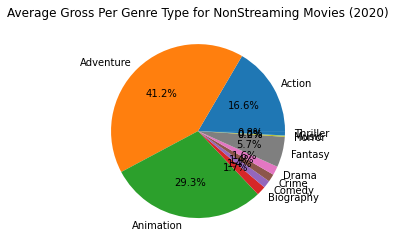

In [35]:
# gross per genre type for 2020 for nonstreaming movies
genre_df_2020 = genre_df.loc[2020].reset_index(drop = False)

plt.pie(genre_df_2020["Gross"], labels = genre_df_2020["Genre"], autopct="%1.1f%%")
plt.title("Average Gross Per Genre Type for NonStreaming Movies (2020)")
plt.show()

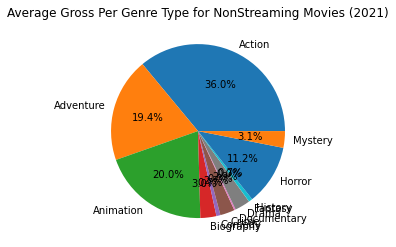

In [36]:
# gross per genre type for 2021 for nonstreaming movies
genre_df_2021 = genre_df.loc[2021].reset_index(drop = False)

plt.pie(genre_df_2021["Gross"], labels = genre_df_2021["Genre"], autopct="%1.1f%%")
plt.title("Average Gross Per Genre Type for NonStreaming Movies (2021)")
plt.show()

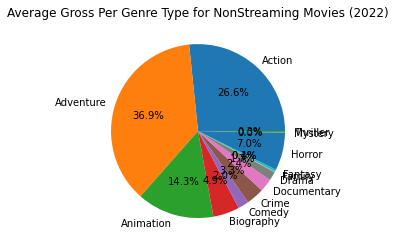

In [37]:
# gross per genre type for 2022 for all movie types
genre_df_2022 = genre_df.loc[2022].reset_index(drop = False)

plt.pie(genre_df_2022["Gross"], labels = genre_df_2022["Genre"], autopct="%1.1f%%")
plt.title("Average Gross Per Genre Type for NonStreaming Movies (2022)")
plt.show()